# Loan Data Exploratory Data Analysis Project
_Set by AICore_

Import required libraries and dependencies i.e both the utils and the tools script and the classes they contain.

In [1]:
import pandas as pd
import missingno as msno
import importlib
pd.set_option('display.max_columns', None)

In [2]:
import db_transformer  # Initial import if not already imported
importlib.reload(db_transformer)

<module 'db_transformer' from 'c:\\Users\\Razer\\Documents\\AI_Core\\Finance-EDA\\db_transformer.py'>

In [3]:
from db_converter import DataConverter
from db_info import DataFrameInfo
from db_deleter import DataDeletion
from db_transformer import DataFrameTransform
from db_plotter import Plotter
df = pd.read_csv(r"Source_Files\loan_payments_data.csv")

In [4]:
converter = DataConverter(df)
info = DataFrameInfo(df)
deleter = DataDeletion(df)
transformer = DataFrameTransform(df)
plotter = Plotter(df)

Brief breakdown of the overall shape of the dataframe

In [5]:
shape = df.shape
print(f'This dataset has {shape[0]} rows and {shape[1]} columns')

This dataset has 54231 rows and 43 columns


The original column data types in the dataframe

In [6]:
print(df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

### Changing the column datatypes

Identifying early on what categories each column should be, organising them into their respective lists, and then applying the type transformations to them

In [7]:
cat_cols = ['application_type', 'grade', 'home_ownership', 'loan_status', 'payment_plan', 'purpose', 'sub_grade', 'verification_status', 'collections_12_mths_ex_med', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'mths_since_last_delinq', 'mths_since_last_record', 'total_accounts', 'mths_since_last_major_derog', 'policy_code', 'employment_length', 'term']
date_cols = ['earliest_credit_line', 'issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']
float_cols = ['loan_amount']
object_cols = ['id', 'member_id']

In [8]:
converter = DataConverter(df)

In [9]:

converter.convert_to_categorical(cat_cols)
converter.convert_to_datetime(date_cols)
converter.convert_to_float(float_cols)
converter.convert_to_object(object_cols)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term (months),int_rate,instalment,grade,sub_grade,employment_length (years),home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36,7.49,248.82,A,A4,5,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36,6.99,407.52,A,A3,9,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36,7.49,497.63,A,A4,8,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36,14.31,514.93,C,C4,1,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36,6.03,456.54,A,A1,10+,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000.0,5000.0,1775.0,36,9.01,159.03,B,B2,1,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000.0,5000.0,2350.0,36,10.59,162.73,C,C2,< 1,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500.0,3500.0,2225.0,36,7.43,108.77,A,A2,10+,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000.0,5000.0,225.0,36,7.43,155.38,A,A2,4,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,0.0,0.0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


### Statistical Breakdown of The DataFrame

In [10]:
info = DataFrameInfo(df)

Below are several statistical quantities of the dataframe, amongst these there are nulls/zeroes count  and skewness

In [11]:
summary_df = info.summarize()
summary_df

,columns,data_types,mode,mean,median,std_dev,unique_values,nulls,null_percentage,zero_count,zero_percentage,skewness
0,id,object,55521,N/A,N/A,N/A,54231,0,0.000000,0,0.000000,N/A
1,member_id,object,70694,N/A,N/A,N/A,54231,0,0.000000,0,0.000000,N/A
2,loan_amount,float64,N/A,13333.0761,12000.0,8082.196709,N/A,0,0.000000,0,0.000000,0.805259
3,funded_amount,float64,N/A,13229.509117,12000.0,8019.017599,N/A,3007,5.544799,0,0.000000,0.821787
4,funded_amount_inv,float64,N/A,12952.622979,11300.0,8099.473527,N/A,0,0.000000,108,0.199148,0.813927
5,term (months),category,36,N/A,N/A,N/A,2,4772,8.799395,0,0.000000,N/A
6,int_rate,float64,N/A,13.507328,13.16,4.392893,N/A,5169,9.531449,0,0.000000,0.412032
7,instalment,float64,N/A,400.013953,347.15,238.920012,N/A,0,0.000000,0,0.000000,0.996981
8,grade,category,B,N/A,N/A,N/A,7,0,0.000000,0,0.000000,N/A
9,sub_grade,category,B3,N/A,N/A,N/A,35,0,0.000000,0,0.000000,N/A


An in-depth break down of the missing values in the dataframe so we can better decide which columns are worth keeping.

                        columns  null_percentage  zero_percentage
0                            id         0.000000         0.000000
1                     member_id         0.000000         0.000000
2                   loan_amount         0.000000         0.000000
3                 funded_amount         5.544799         0.000000
4             funded_amount_inv         0.000000         0.199148
5                 term (months)         8.799395         0.000000
6                      int_rate         9.531449         0.000000
7                    instalment         0.000000         0.000000
8                         grade         0.000000         0.000000
9                     sub_grade         0.000000         0.000000
10    employment_length (years)         3.905515         0.000000
11               home_ownership         0.000000         0.000000
12                   annual_inc         0.000000         0.000000
13          verification_status         0.000000         0.000000
14        

<Axes: >

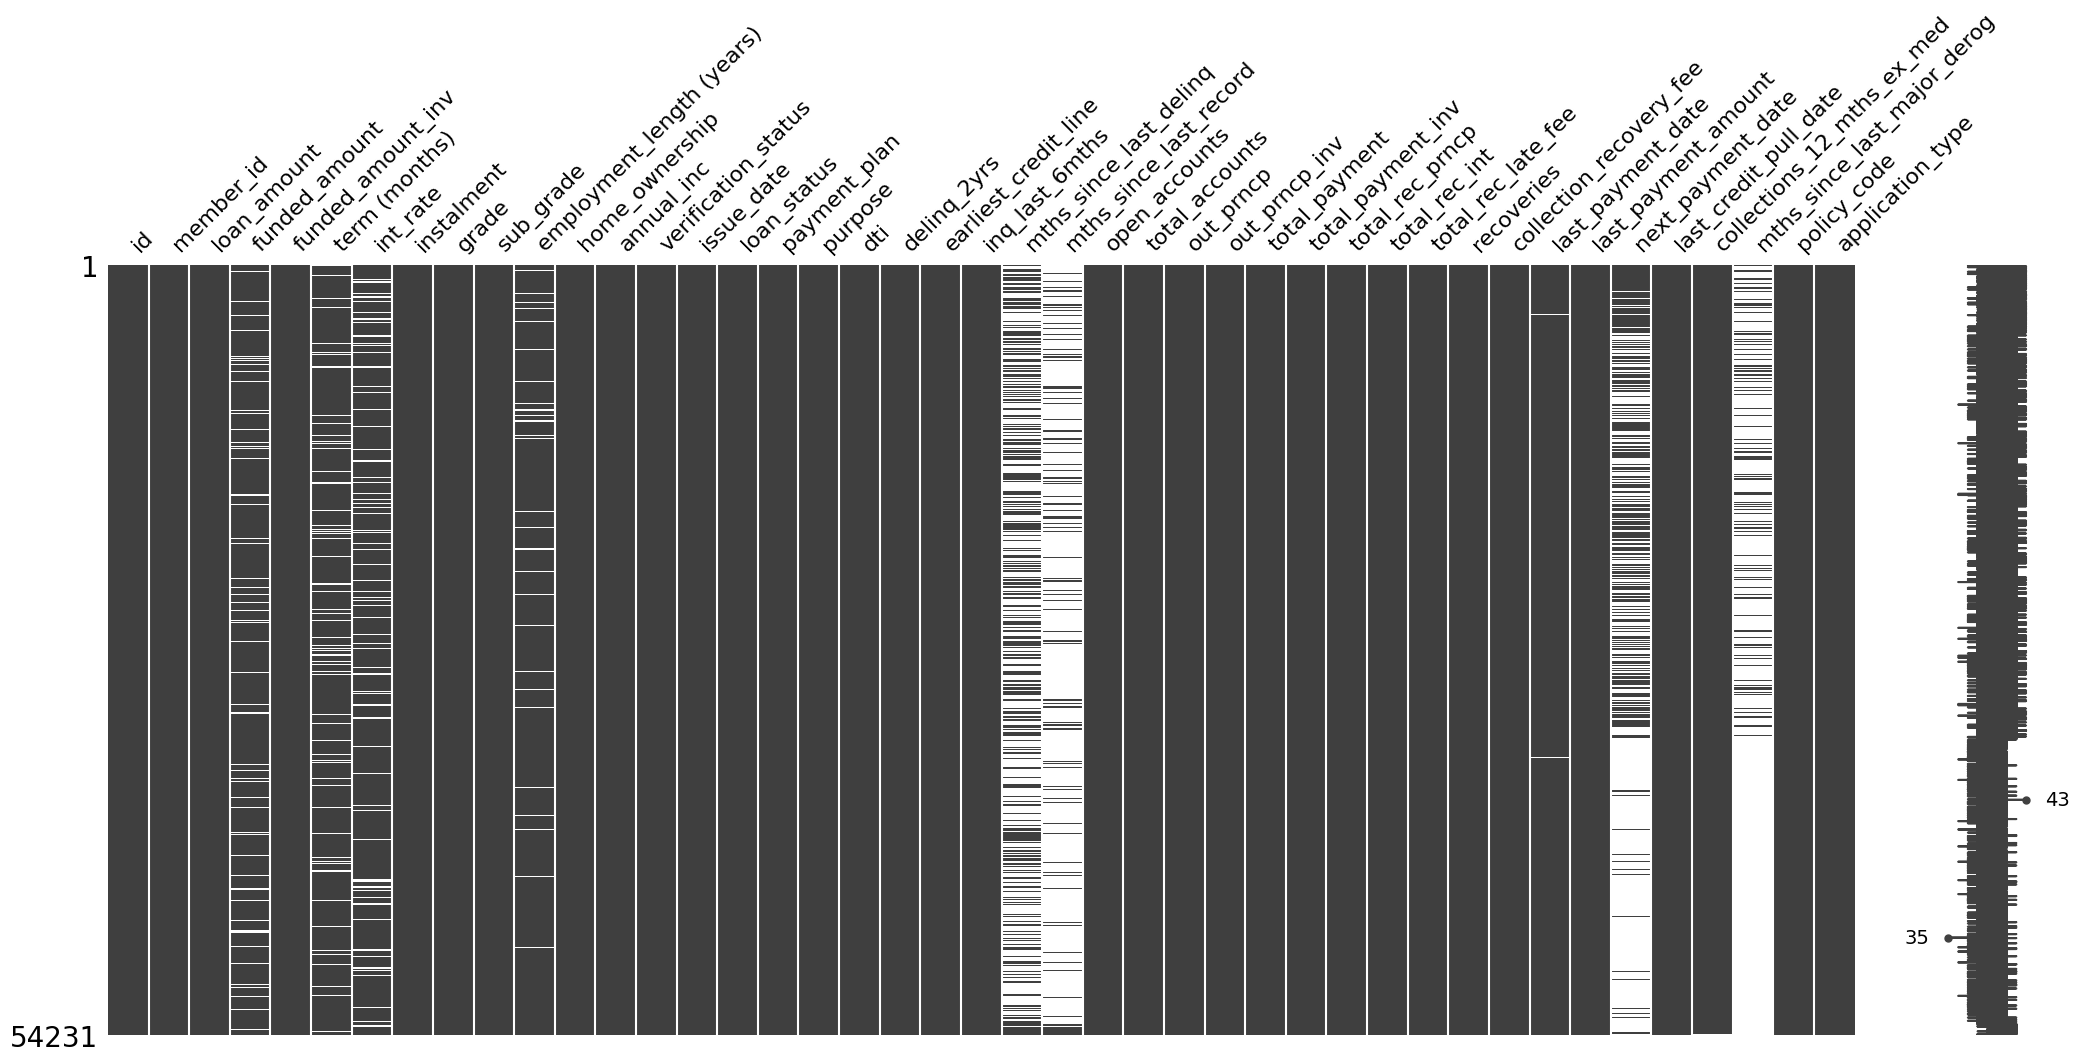

In [12]:
missing_no = msno.matrix(df)
print(summary_df.loc[:, ['columns','null_percentage', 'zero_percentage']])
missing_no

In [13]:
corr_matrix = info.correlation_columns()
corr_matrix = corr_matrix.where(~corr_matrix.isin([1]))
result = corr_matrix[corr_matrix > 0.9].stack().reset_index()

In [14]:
result

,level_0,level_1,0
0,loan_amount,funded_amount,0.993946
1,loan_amount,funded_amount_inv,0.975248
2,loan_amount,instalment,0.947109
3,funded_amount,loan_amount,0.993946
4,funded_amount,funded_amount_inv,0.982458
5,funded_amount,instalment,0.955657
6,funded_amount_inv,loan_amount,0.975248
7,funded_amount_inv,funded_amount,0.982458
8,funded_amount_inv,instalment,0.935176
9,instalment,loan_amount,0.947109


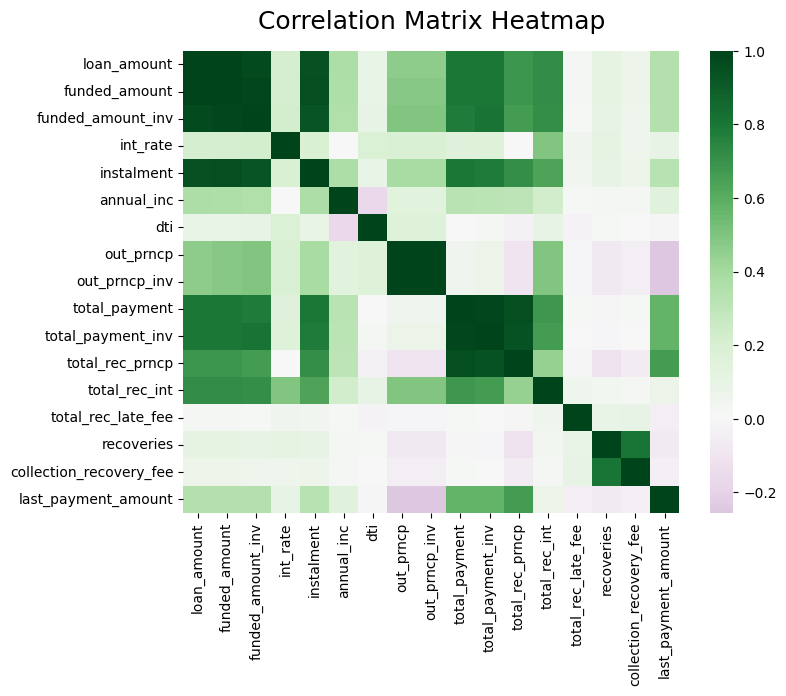

In [15]:
plotter.heatmap(info.correlation_columns())

##### Columns To Remove <br>
- funded_amount_inv 
    - removing this as it has a high corr with funded_amount. The latter column gives a breakdown committed by investors, but given the high correlation and the presence of zeros, this column may not add much additional insight
- total_payment_inv - high corr with total_payment with more zeroes
- total_rec_late_fee - too many zeroes
- collections_12_mths_ex_med - too many zeroes
- Remove mths_since_last_record: High null percentage so most liekly minimal useful data.

### Deleting Columns

Here we combine the gained knowledge of the missing values, column correlation and amount of zeroes in a column. If the columns are deemed unneccesary, or don't provide any legible information then they will be removed.

In [16]:
deleter = DataDeletion(df)

In [17]:
deleter.delete_column('mths_since_last_delinq')
deleter.delete_column('mths_since_last_record')
deleter.delete_column('next_payment_date')
deleter.delete_column('mths_since_last_major_derog')
deleter.delete_column('funded_amount')

In [18]:
plotter = Plotter(df)

A discrete probability distribution will be performed on employment length as it is one of the few categorical columns that has a reasonable amount of NULLs, from here we can decide what to do with this column

Due to some of the numbers being adjoined to additional symbols, manual ordering is required to keep the plot consistent.

In [19]:
employment_order = ['< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']

In [20]:
df['employment_length (years)'] = pd.Categorical(df['employment_length (years)'], categories=employment_order, ordered=True)

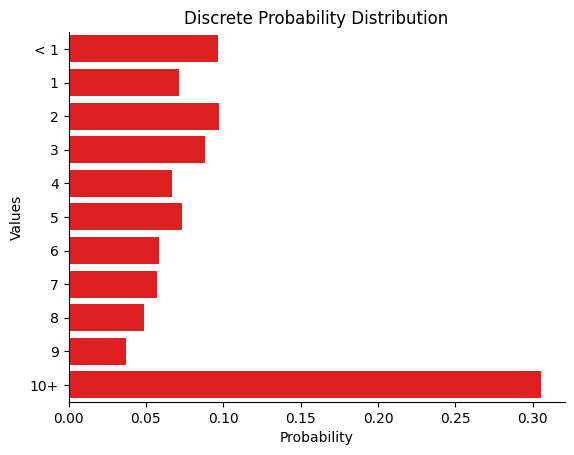

In [21]:
plotter.discrete_probability_distribution('employment_length (years)')

Here we can see that a great amount of this column is employees who have an employment length of 10+ years, as it's a sizeable amount of this column anyway, we can impute the mode here, as we will do with all our categorical columns

In [22]:
transformer = DataFrameTransform(df)

In [23]:
deleter.delete_row('last_payment_date')
deleter.delete_row('last_credit_pull_date')

This function will impute the modal values for all categorical columns, so we can keep the original amount of distinct values the same and avoid changing the probability distribution of the column. For numerical columns we will impute the median as this will be the middle value of the probability distribution of these columns

In [24]:
transformer.impute_missing_values() 

,id,member_id,loan_amount,funded_amount_inv,term (months),int_rate,instalment,grade,sub_grade,employment_length (years),home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,36,7.49,248.82,A,A4,5,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,36,6.99,407.52,A,A3,9,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,36,7.49,497.63,A,A4,8,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,36,14.31,514.93,C,C4,1,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,36,6.03,456.54,A,A1,10+,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000.0,1775.0,36,9.01,159.03,B,B2,1,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000.0,2350.0,36,10.59,162.73,C,C2,< 1,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500.0,2225.0,36,7.43,108.77,A,A2,10+,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000.0,225.0,36,7.43,155.38,A,A2,4,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,0.0,1,INDIVIDUAL


Interest rate and term both have a chunk of NULLs in their column - as these are both important columns, so removing them is not an option and imputing values within these columns may throw off the data per user, if both entries in these columns are missing, only then will the entire entry be deleted  

In [25]:
deleter.delete_row_if_both_null('int_rate', 'term (months)')

After sifting through the data, one point I've identified is that when you order the df by sub_grade the int_rates end up clustering together in similar groups. Going down this route may still lead to inaccuracies, but there are only a few records where the previous ends up being different

In [26]:
transformer.impute_previous_row_value('sub_grade', 'int_rate')

,id,member_id,loan_amount,funded_amount_inv,term (months),int_rate,instalment,grade,sub_grade,employment_length (years),home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,36,7.49,248.82,A,A4,5,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,36,6.99,407.52,A,A3,9,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,36,7.49,497.63,A,A4,8,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,36,14.31,514.93,C,C4,1,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,36,6.03,456.54,A,A1,10+,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000.0,1775.0,36,9.01,159.03,B,B2,1,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,0.0,1,INDIVIDUAL
54227,142608,74724,5000.0,2350.0,36,10.59,162.73,C,C2,< 1,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500.0,2225.0,36,7.43,108.77,A,A2,10+,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,0.0,1,INDIVIDUAL
54229,88854,70699,5000.0,225.0,36,7.43,155.38,A,A2,4,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,0.0,1,INDIVIDUAL


In [27]:
info.summarize()

,columns,data_types,mode,mean,median,std_dev,unique_values,nulls,null_percentage,zero_count,zero_percentage,skewness
0,id,object,55521,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
1,member_id,object,70694,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
2,loan_amount,float64,N/A,13338.588853,12000.0,8080.919795,N/A,0,0.0,0,0.000000,0.804922
3,funded_amount_inv,float64,N/A,12958.374671,11325.0,8098.334274,N/A,0,0.0,108,0.199442,0.813376
4,term (months),category,36,N/A,N/A,N/A,2,0,0.0,0,0.000000,N/A
5,int_rate,float64,N/A,13.472743,13.16,4.179808,N/A,0,0.0,0,0.000000,0.45662
6,instalment,float64,N/A,400.160042,347.15,238.875513,N/A,0,0.0,0,0.000000,0.996572
7,grade,category,B,N/A,N/A,N/A,7,0,0.0,0,0.000000,N/A
8,sub_grade,category,B3,N/A,N/A,N/A,35,0,0.0,0,0.000000,N/A
9,employment_length (years),category,10+,N/A,N/A,N/A,11,0,0.0,0,0.000000,N/A


In [28]:
# Group by 'Category' and calculate mean, median, and std dev
grouped = df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])

# Display the result
print(grouped)

                mean  median       std    max    min
sub_grade                                           
A1          6.685078    6.03  2.254032  13.16   5.42
A2          7.219811    6.62  2.040788  13.16   5.79
A3          7.840697    7.62  1.691583  13.16   6.17
A4          8.226601    7.90  1.564880  13.16   6.54
A5          9.034191    8.90  1.509618  13.16   6.91
B1         10.087742    9.88  1.085859  13.16   6.00
B2         10.947902   10.99  0.887303  13.16   9.01
B3         11.619280   11.83  0.785828  13.16   9.33
B4         12.331438   12.85  0.849219  13.16   9.64
B5         12.685803   13.05  0.990505  13.67   6.00
C1         13.465313   13.68  0.806315  14.30   6.00
C2         13.978490   14.27  0.944971  15.10  10.59
C3         14.566625   14.98  1.076460  15.61   6.00
C4         15.138073   15.61  1.208803  16.20  11.22
C5         15.785469   16.24  1.456358  17.10  11.54
D1         16.326172   16.99  1.664628  17.76   6.00
D2         16.510698   16.77  1.898169  18.55 

C:\Users\Razer\AppData\Local\Temp\ipykernel_36444\2305057565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])


The completed datatype conversions

In [29]:
df.dtypes

id                                    object
member_id                             object
loan_amount                          float64
funded_amount_inv                    float64
term (months)                       category
int_rate                             float64
instalment                           float64
grade                               category
sub_grade                           category
employment_length (years)           category
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_date                    datetime64[ns]
loan_status                         category
payment_plan                        category
purpose                             category
dti                                  float64
delinq_2yrs                         category
earliest_credit_line          datetime64[ns]
inq_last_6mths                      category
open_accounts                       category
total_acco

Statistical values after data deletion and imputation

In [30]:
info.summarize()

,columns,data_types,mode,mean,median,std_dev,unique_values,nulls,null_percentage,zero_count,zero_percentage,skewness
0,id,object,55521,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
1,member_id,object,70694,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
2,loan_amount,float64,N/A,13338.588853,12000.0,8080.919795,N/A,0,0.0,0,0.000000,0.804922
3,funded_amount_inv,float64,N/A,12958.374671,11325.0,8098.334274,N/A,0,0.0,108,0.199442,0.813376
4,term (months),category,36,N/A,N/A,N/A,2,0,0.0,0,0.000000,N/A
5,int_rate,float64,N/A,13.472743,13.16,4.179808,N/A,0,0.0,0,0.000000,0.45662
6,instalment,float64,N/A,400.160042,347.15,238.875513,N/A,0,0.0,0,0.000000,0.996572
7,grade,category,B,N/A,N/A,N/A,7,0,0.0,0,0.000000,N/A
8,sub_grade,category,B3,N/A,N/A,N/A,35,0,0.0,0,0.000000,N/A
9,employment_length (years),category,10+,N/A,N/A,N/A,11,0,0.0,0,0.000000,N/A


In [31]:
#transformer.impute_term('term (months)', 'loan_amount', 'int_rate', 'instalment')

In [32]:
info.summarize()

,columns,data_types,mode,mean,median,std_dev,unique_values,nulls,null_percentage,zero_count,zero_percentage,skewness
0,id,object,55521,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
1,member_id,object,70694,N/A,N/A,N/A,54151,0,0.0,0,0.000000,N/A
2,loan_amount,float64,N/A,13338.588853,12000.0,8080.919795,N/A,0,0.0,0,0.000000,0.804922
3,funded_amount_inv,float64,N/A,12958.374671,11325.0,8098.334274,N/A,0,0.0,108,0.199442,0.813376
4,term (months),category,36,N/A,N/A,N/A,2,0,0.0,0,0.000000,N/A
5,int_rate,float64,N/A,13.472743,13.16,4.179808,N/A,0,0.0,0,0.000000,0.45662
6,instalment,float64,N/A,400.160042,347.15,238.875513,N/A,0,0.0,0,0.000000,0.996572
7,grade,category,B,N/A,N/A,N/A,7,0,0.0,0,0.000000,N/A
8,sub_grade,category,B3,N/A,N/A,N/A,35,0,0.0,0,0.000000,N/A
9,employment_length (years),category,10+,N/A,N/A,N/A,11,0,0.0,0,0.000000,N/A


Although there are only 2 values within this column, it was interesting to see what the distribution of these two values are like - and as we can see 36 months makes up over 70% of the values within this column

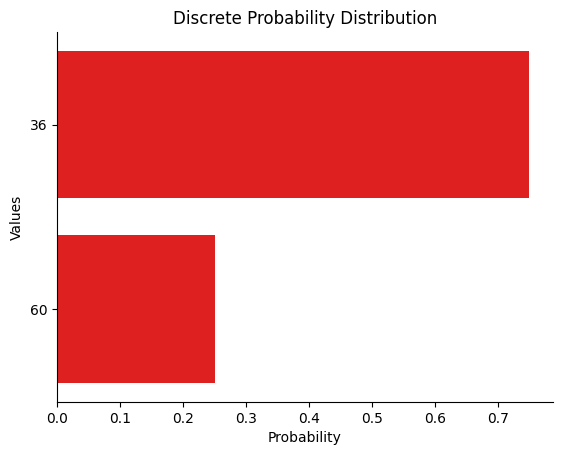

In [33]:
plotter.discrete_probability_distribution('term (months)')

No more missing values

<Axes: >

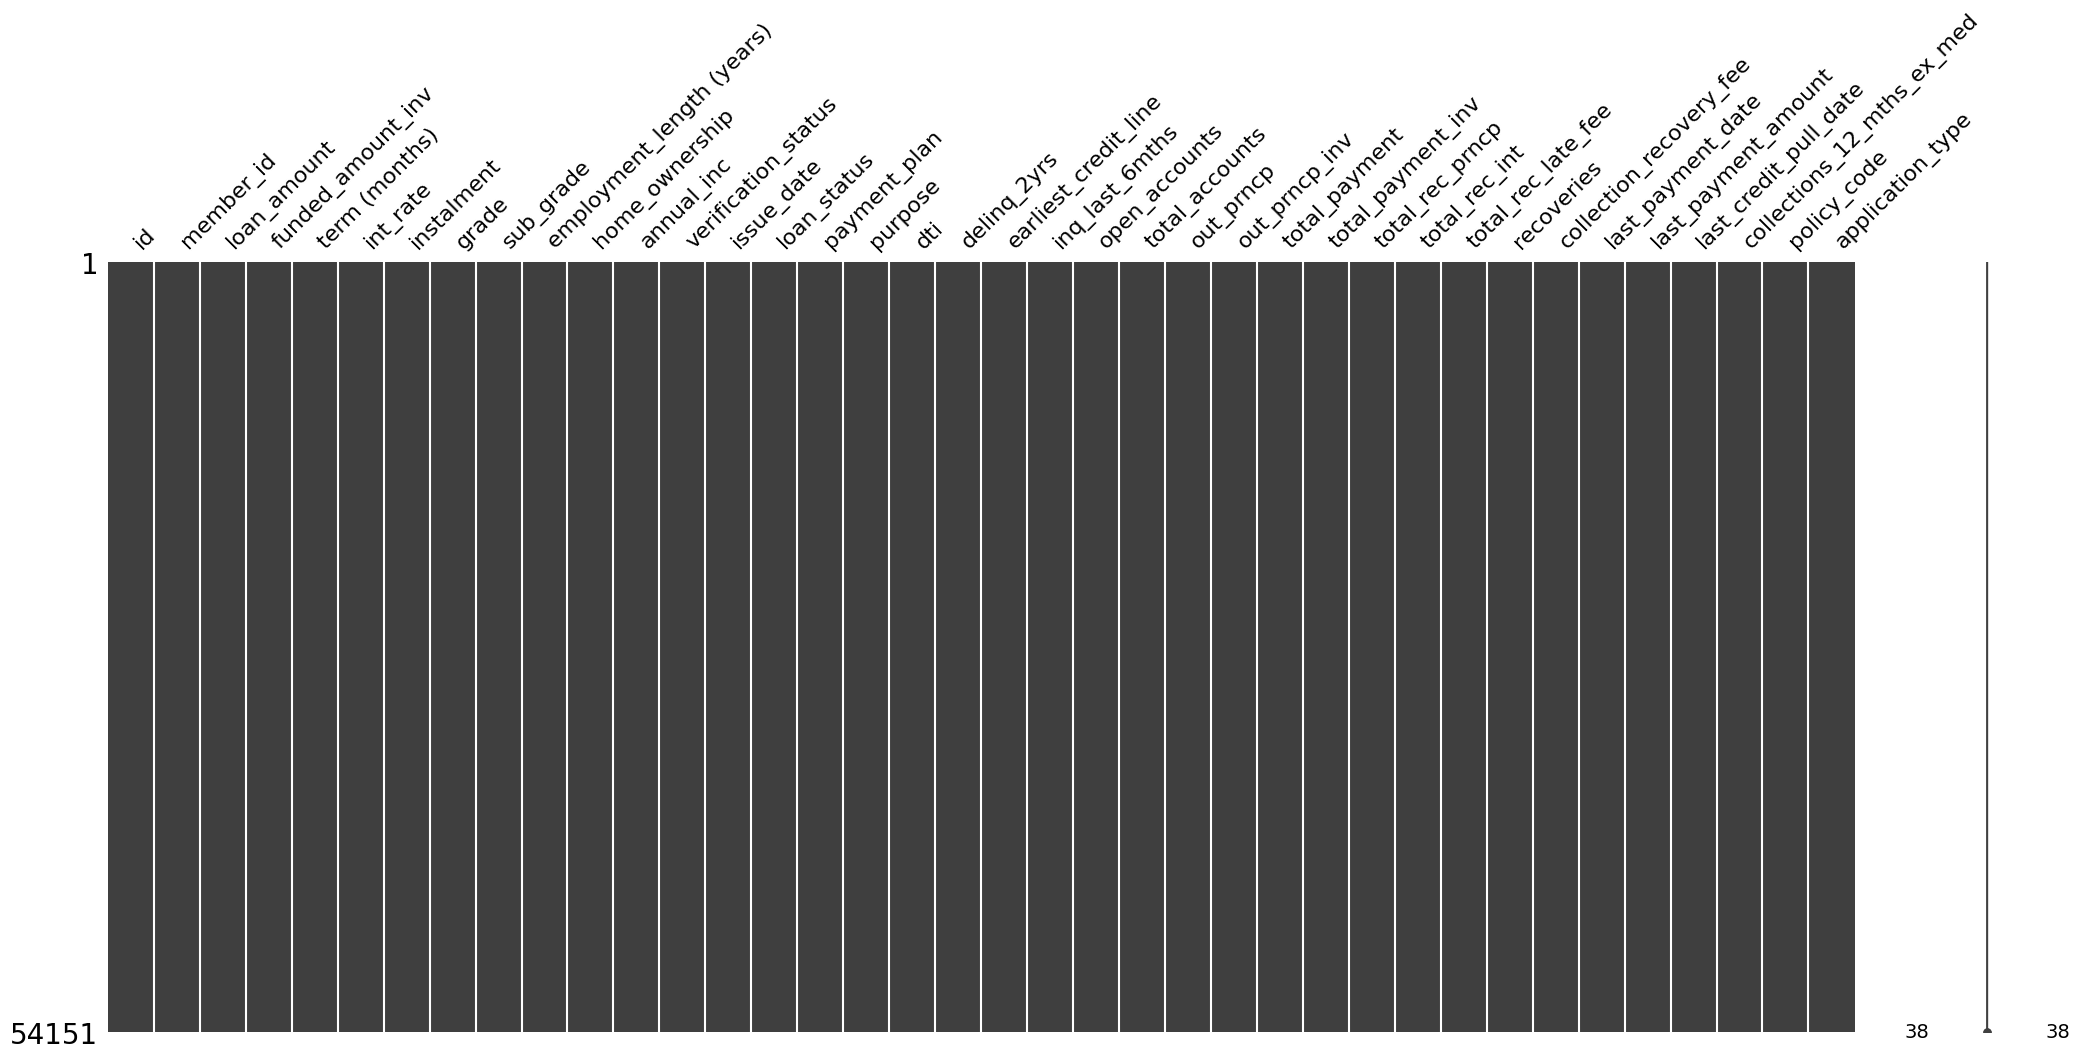

In [34]:
msno.matrix(df)

Saving this as a pre-transformed csv file as this is what will be used to query the data in the next milestone

In [35]:
df.to_csv(r'Source_Files\pretransformed_loan_payments.csv', index=False)

## Skewness Correction

Quick overview of the skewness in the dataframe

In [36]:
numeric = df.select_dtypes(include=['number']).columns
df[numeric].skew()

loan_amount                 0.804922
funded_amount_inv           0.813376
int_rate                    0.456620
instalment                  0.996572
annual_inc                  8.717500
dti                         0.189101
out_prncp                   2.354051
out_prncp_inv               2.354471
total_payment               1.269875
total_payment_inv           1.257870
total_rec_prncp             1.262679
total_rec_int               2.204585
total_rec_late_fee         13.174553
recoveries                 14.389299
collection_recovery_fee    27.807754
last_payment_amount         2.497220
dtype: float64

From the above data what we can see is that for majority of these columns have their skewness lying in relatively manageable territory, however, the 3 columns: `total_rec_late_fee`, `recoveries`, `collection_recovery_fee` have an incredibly high skewness and this can be attributed to the fact that a majority of these values are zero which throws off the skewness. Thus, these columns will not undergo skewness rectification

Below you can see the skewness visualised using histograms and QQ plots

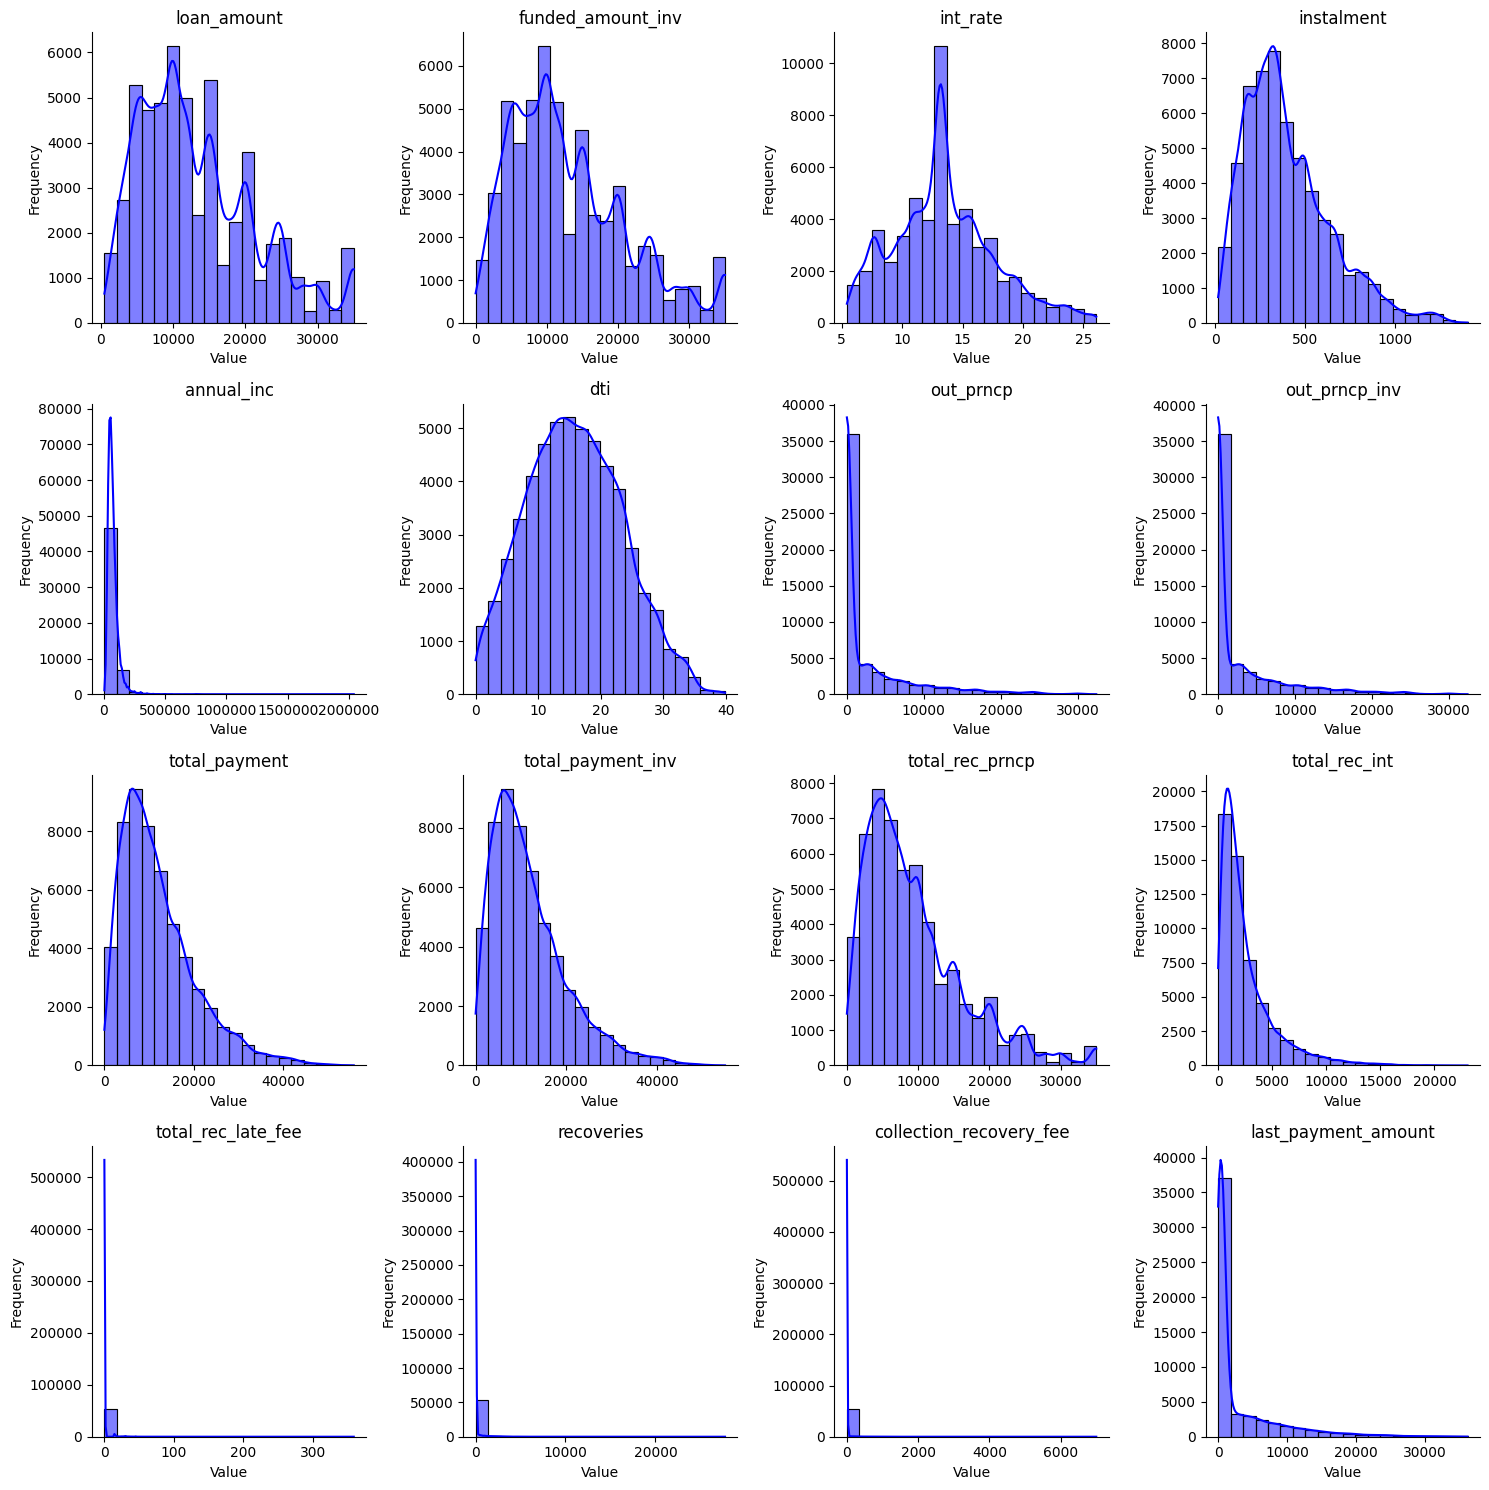

None


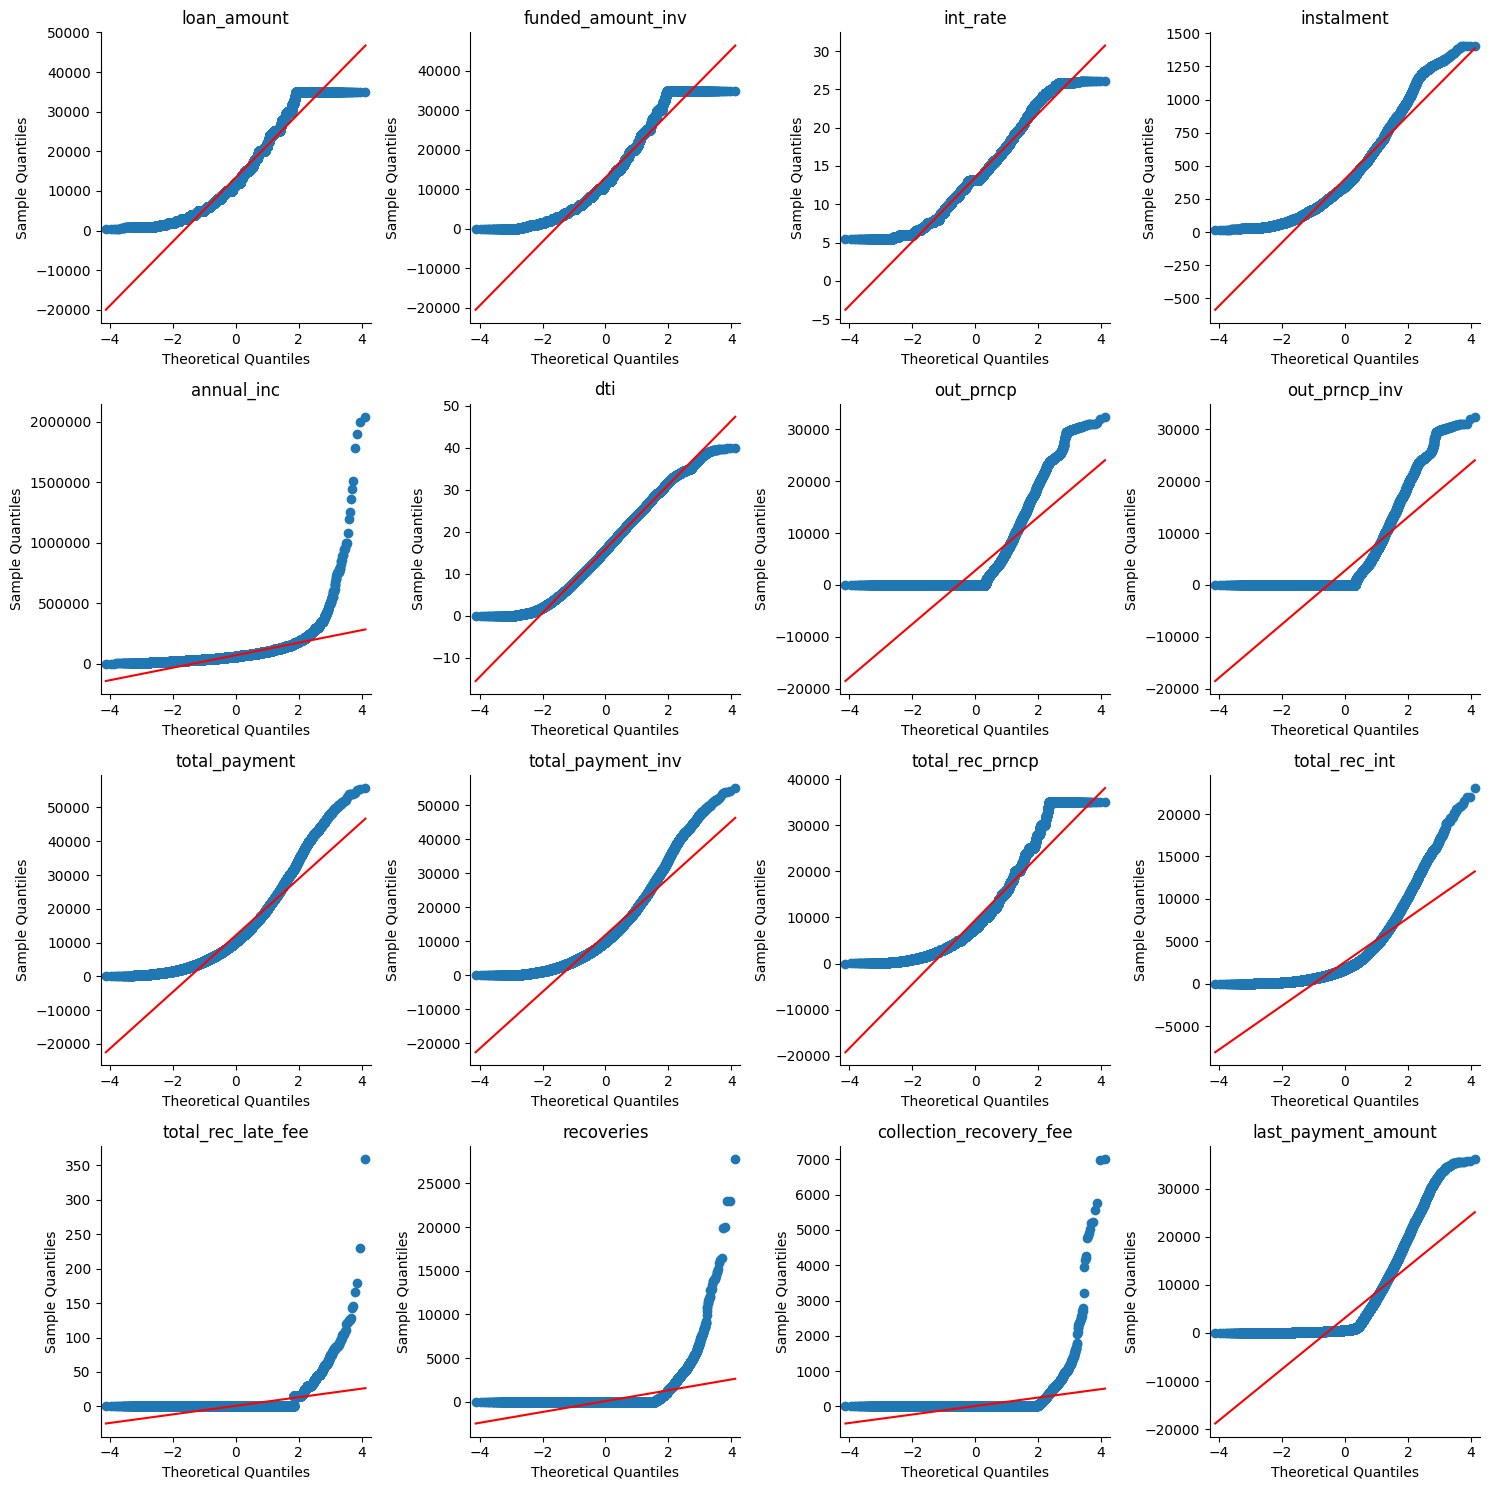

None


In [37]:
print(plotter.histogram_df_columns())
print(plotter.qqplot_df_columns())

In [38]:
info.summarize().loc[info.summarize()['columns'].isin(numeric), ['columns', 'zero_count', 'zero_percentage']]

,columns,zero_count,zero_percentage
2,loan_amount,0,0.000000
3,funded_amount_inv,108,0.199442
5,int_rate,0,0.000000
6,instalment,0,0.000000
11,annual_inc,0,0.000000
17,dti,111,0.204982
23,out_prncp,33883,62.571328
24,out_prncp_inv,33883,62.571328
25,total_payment,0,0.000000
26,total_payment_inv,128,0.236376


From these visualisations a further 3 columns will be ommited from skewness rectification, these are: `out_prncp`, `out_prncp_inv`, `last_payment_amount`. Although these didn't have as high of a skewness as those we've previously declared omitted, the histograms and the QQ plots for these columns show these columns as being skewed due to having a high number of zeroes

In [39]:
info.analyze_skew_methods(numeric)

,Column,Original Skewness,Box-Cox Skewness,Log Skewness,Yeo-Johnson Skewness
0,loan_amount,0.804900,-0.043077,-0.676705,-0.043067
1,funded_amount_inv,0.813354,NaN,NaN,-0.036085
2,int_rate,0.456607,-0.013378,-0.314132,-0.011062
3,instalment,0.996545,-0.020712,-0.655774,-0.020656
4,annual_inc,8.717258,-0.012080,0.139246,-0.012084
5,dti,0.189095,NaN,NaN,-0.087479
6,out_prncp,2.353986,NaN,NaN,0.530596
7,out_prncp_inv,2.354406,NaN,NaN,0.530614
8,total_payment,1.269840,-0.013814,-0.752156,-0.013836
9,total_payment_inv,1.257835,NaN,NaN,0.005208


Here we pick the method of skewness that would bring the skewness values the closest to zero

In [40]:
boxcox_cols = ['loan_amount', 'int_rate', 'instalment', 'annual_inc', 'total_payment', 'total_rec_int']
yj_cols = ['funded_amount_inv', 'dti', 'total_payment_inv', 'total_rec_prncp', 'last_payment_amount']

In [41]:
from scipy.stats import boxcox, yeojohnson
for col in boxcox_cols:
    df[col], _ = boxcox(df[col])

for col in yj_cols:
    df[col], _ = yeojohnson(df[col])

In [42]:
# for col in boxcox_cols:
#     transformer.apply_boxcox(col)

# for col in yj_cols:
#     transformer.apply_yeojohnson(col)

# df = df

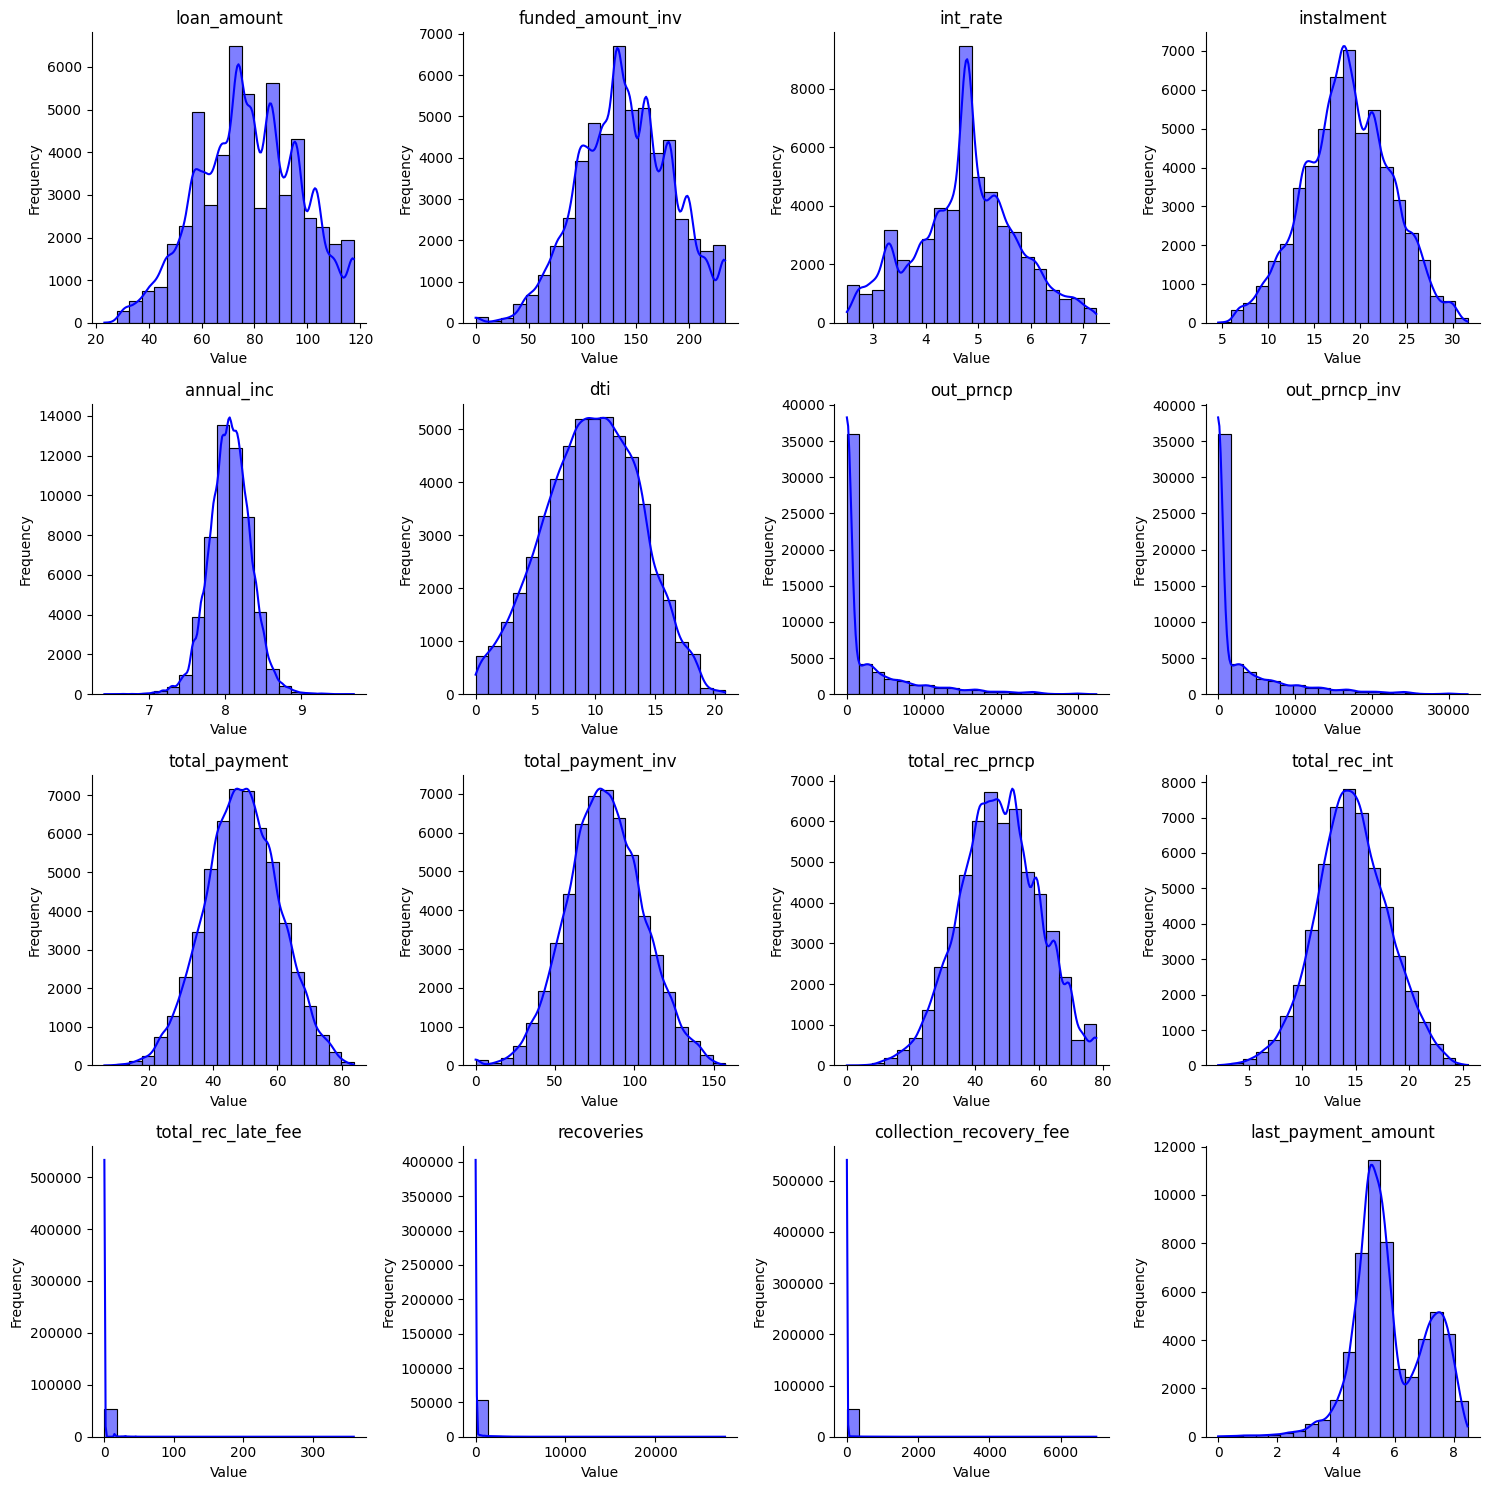

None


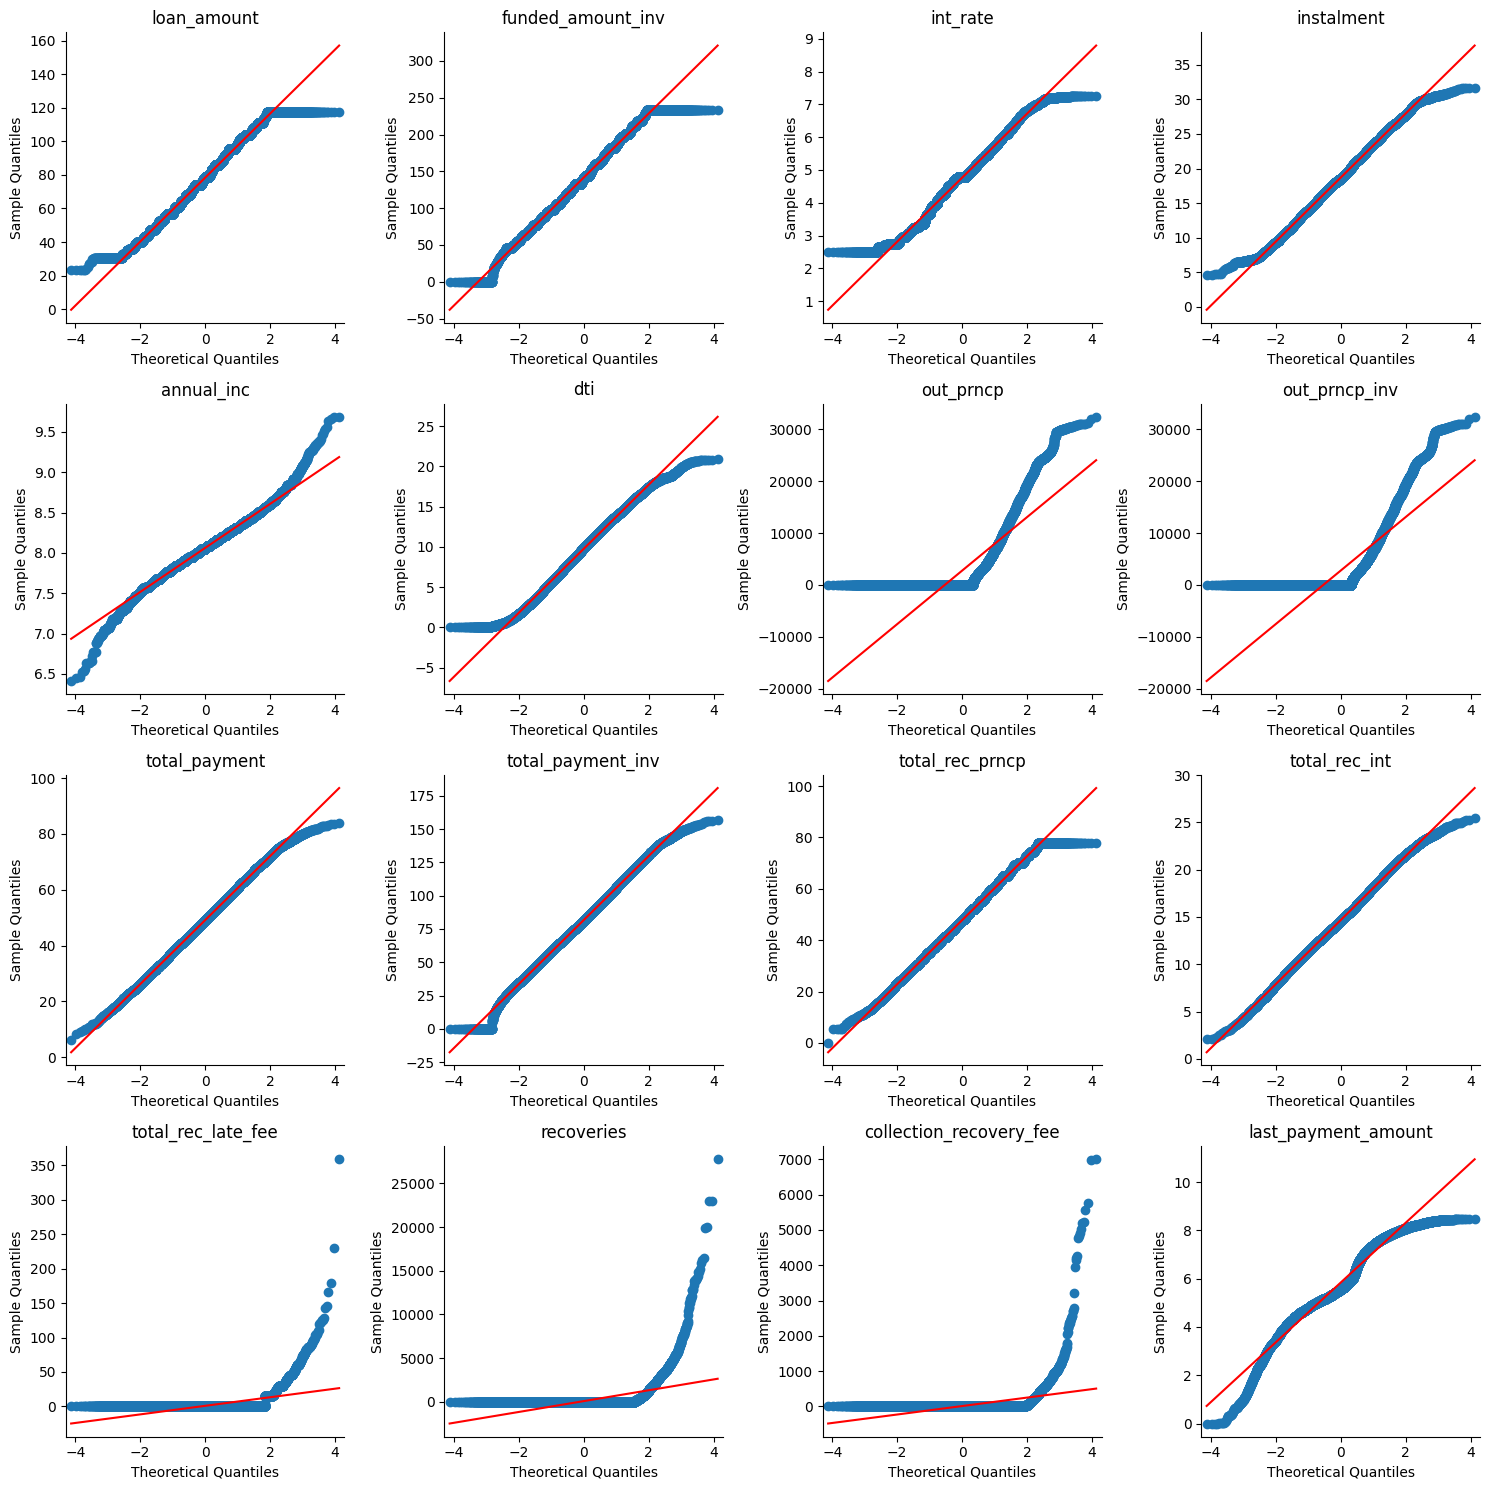

None


In [43]:
print(plotter.histogram_df_columns())
print(plotter.qqplot_df_columns())

All these columns have now had their skewness rectified 

#### Outlier Removal

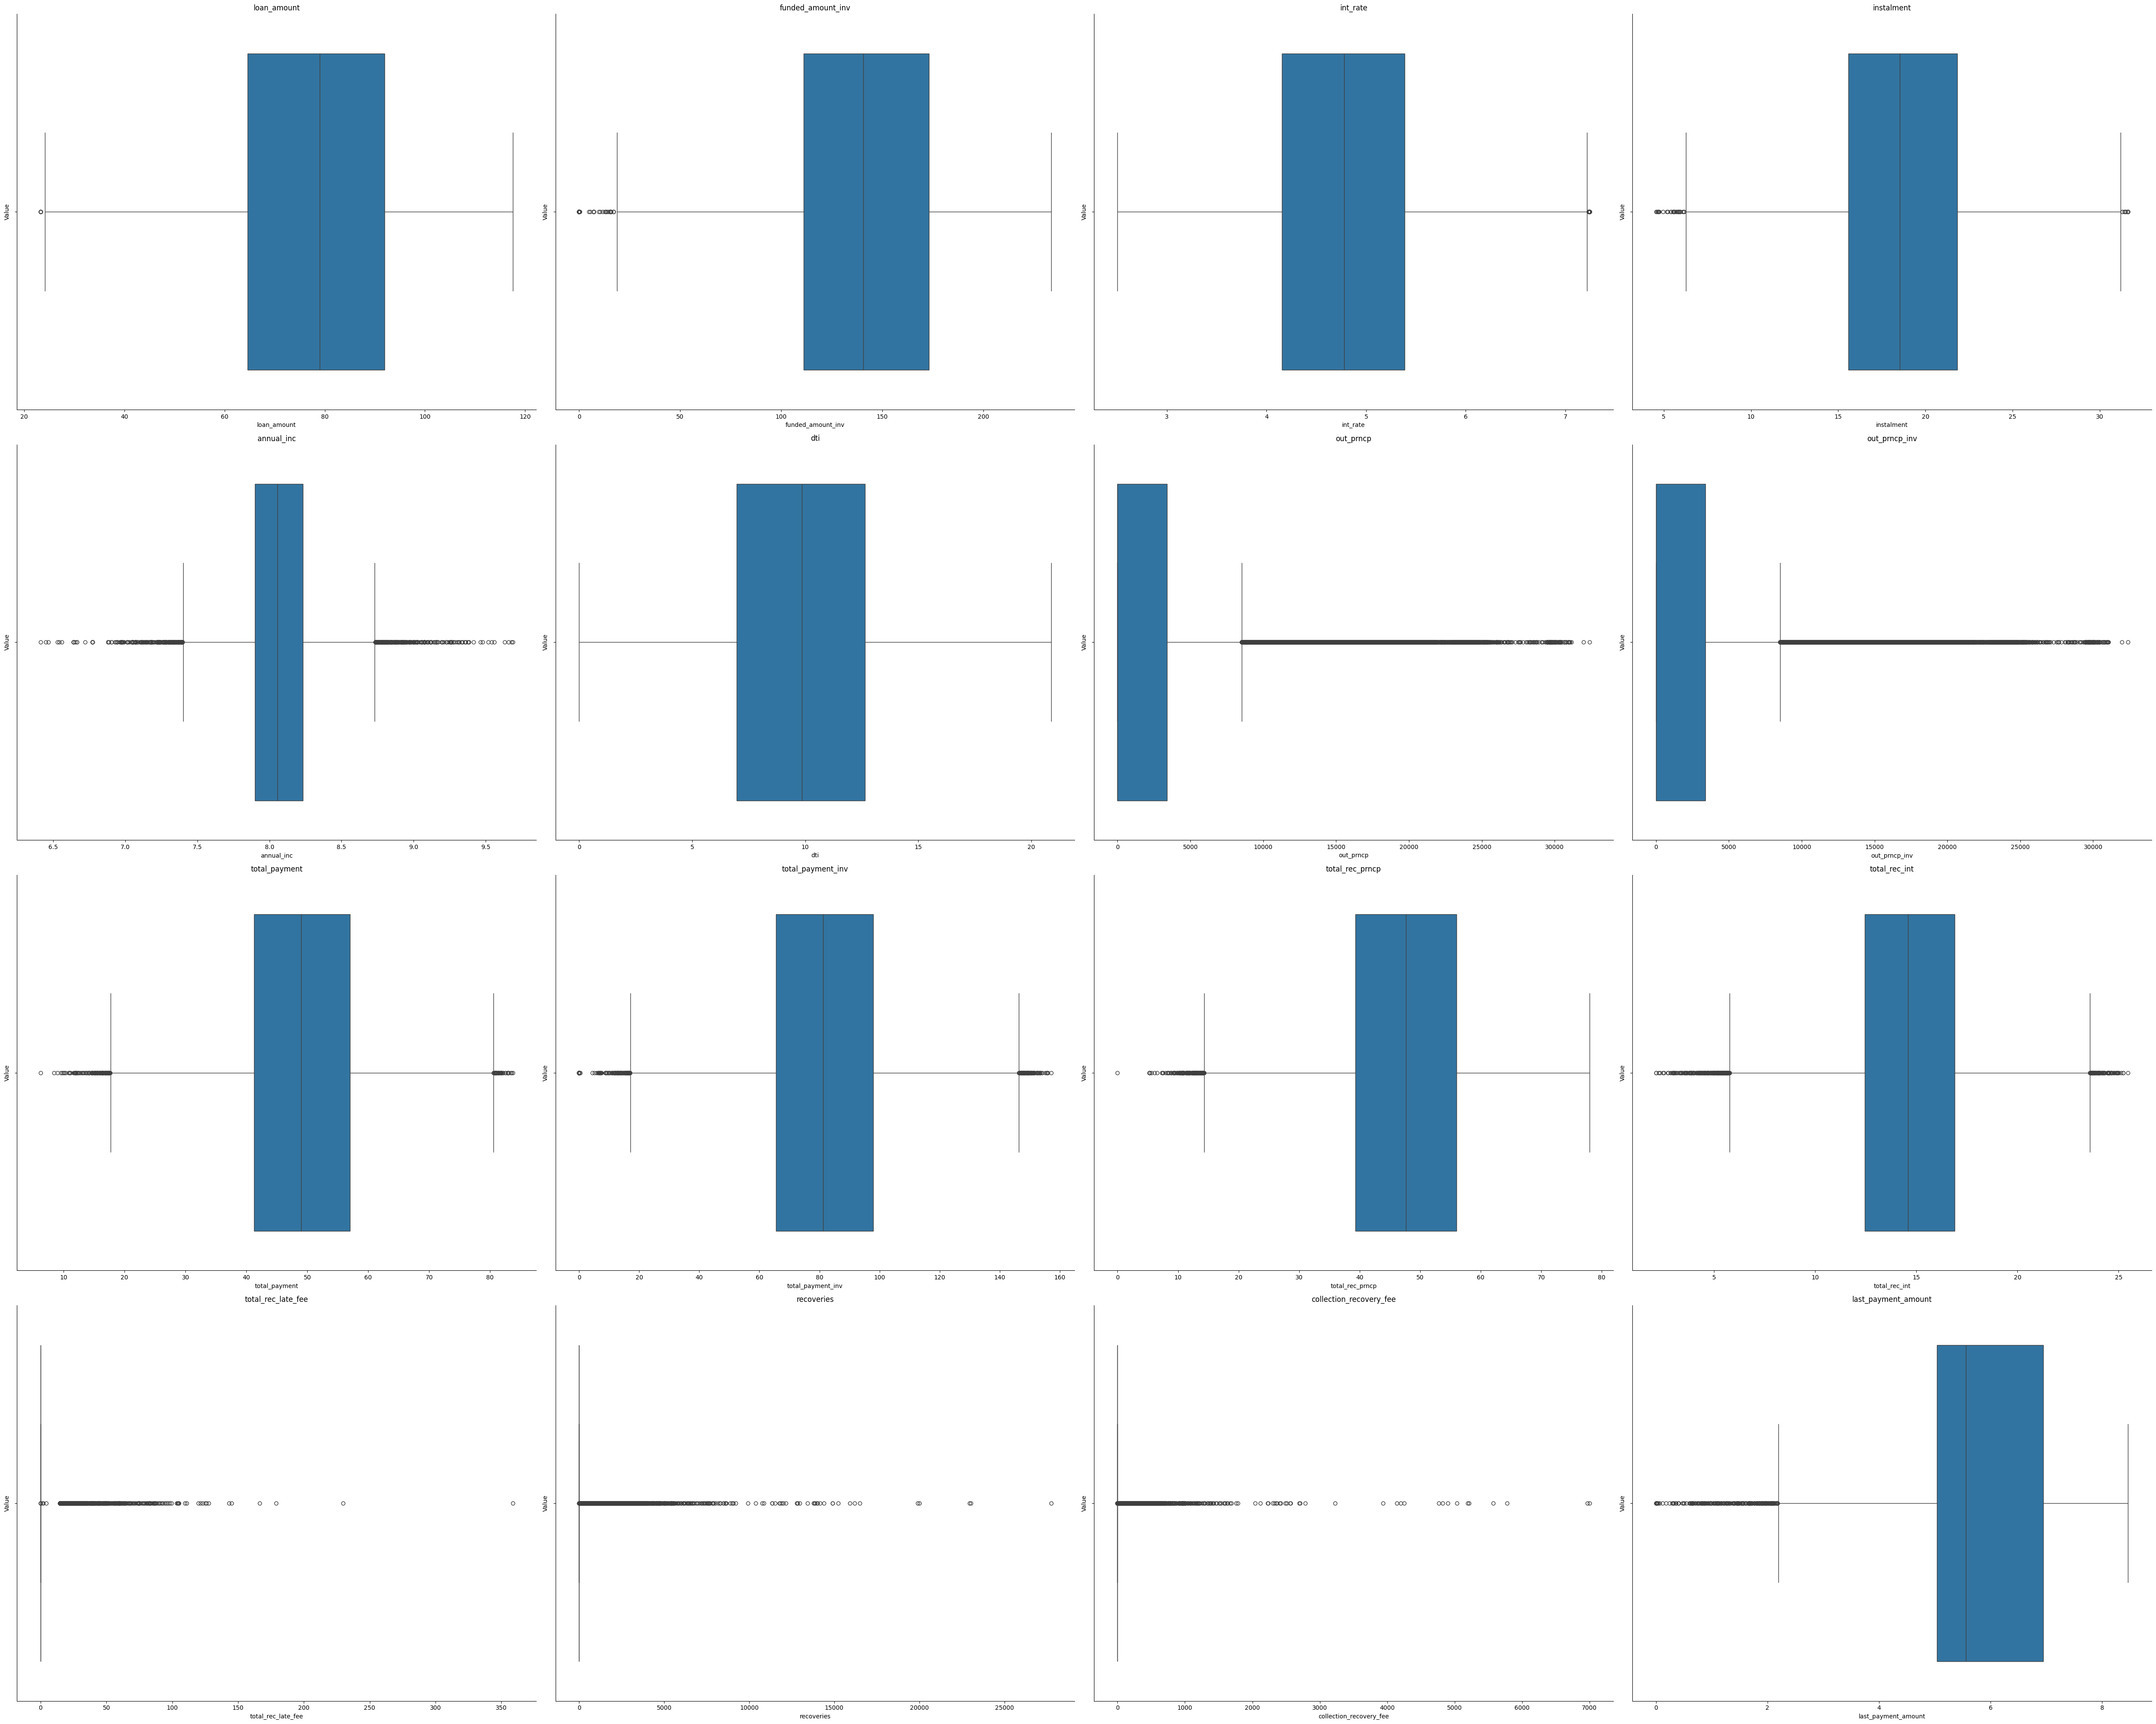

In [44]:
plotter.boxplot()

In [45]:
transformer.remove_outliers_iqr('instalment')
print(transformer.df['instalment'].describe())
transformer.remove_outliers_iqr('annual_inc')
print(transformer.df['annual_inc'].describe())
transformer.remove_outliers_iqr('total_payment')
print(transformer.df['total_payment'].describe())
transformer.remove_outliers_iqr('total_payment_inv')
print(transformer.df['total_payment_inv'].describe())
transformer.remove_outliers_iqr('total_rec_prncp')
print(transformer.df['total_rec_prncp'].describe())
transformer.remove_outliers_iqr('total_rec_int')
print(transformer.df['total_rec_int'].describe())

Initial shape before removing outliers: (54151, 38)
Lower bound: 6.2096426267554, Upper bound: 31.19532749442502
Final shape after removing outliers: (54111, 38)
No remaining outliers in column instalment.
count    54111.000000
mean        18.680330
std          4.624615
min          6.278327
25%         15.585723
50%         18.538607
75%         21.824260
max         31.193627
Name: instalment, dtype: float64
Initial shape before removing outliers: (54111, 38)
Lower bound: 7.397911050260138, Upper bound: 8.731818393716942
Final shape after removing outliers: (52989, 38)
No remaining outliers in column annual_inc.
count    52989.000000
mean         8.062199
std          0.246475
min          7.402082
25%          7.898126
50%          8.056646
75%          8.225696
max          8.729149
Name: annual_inc, dtype: float64
Initial shape before removing outliers: (52989, 38)
Lower bound: 18.244277423439407, Upper bound: 80.18281786251524
Final shape after removing outliers: (52794, 38)
No 

This will store the transformed dataframe - if we do ever require it in the future

In [46]:
df.to_csv(r'Source_Files\transformed_loan_payments.csv', index=False)